In [521]:
import gzip        
import pickle    
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from scipy.signal import find_peaks
import cmocean.cm as cmo



In [522]:
def mesh_index_to_km(x):
    return (x / 299) * 110

# INPUT: TEST VARIABLE + TEST VALUE + FILEPATH

In [523]:
# Comment out variables not used
# test_variable = "-Amin m/yr"
# test_variable = "-Amax m/yr"
test_variable = "-Amin & Amax m/yr"


# test_state = 'Retreating'
# test_state = 'Retracted'
# test_state = 'Advancing'
test_state = 'Extended'


# lead_up_yr = 4305     #Retreating
# lead_up_yr = 4500       #Retracted
# lead_up_yr = 4900     #Advancing
lead_up_yr = 5175     #Extended

value = "1 kyr" # years of model simulation

# Path to lead-up simulation (Retreating, Retracted, Advancing, Extended)

# Retreating
# path_leadup = "/home/kayatroyer/Repositories/brinkmodeltest/LeadUpRuns/RetreatState/DATA_Dictionary_2025_08_28__17_20_59.pkl.gz" 

# Retracted
# path_leadup = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_28__17_55_27.pkl.gz" 

# Advancing
# path_leadup = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_29__10_37_33.pkl.gz" 

# Extended
path_leadup = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_29__11_10_26.pkl.gz" 



# # Path to single restart simulation
# path = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__17_19_48.pkl.gz"

In [524]:
# Paths to multiple restart simulations

# RETREAT STARTS
# paths = {
#     "Amin-18" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__17_19_48.pkl.gz",
#     "Amin-20" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__16_57_45.pkl.gz",
#     "Amin-22" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__17_39_48.pkl.gz",
#     "Amax6" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__18_08_06.pkl.gz",
#     "Amax4" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__18_19_11.pkl.gz",
#     "Amax7 Amin-17" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__17_32_42.pkl.gz",
#     "Amax7 Amin-18" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__18_46_01.pkl.gz",    
#     "Amax6 Amin-17" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__18_33_01.pkl.gz",
# }

# RETRACTED STARTS
# paths = {
#     "Amin-18" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__18_39_01.pkl.gz",
#     "Amin-20" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__18_51_58.pkl.gz",
#     "Amax6" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__19_13_37.pkl.gz",
#     "Amax4" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_02__19_22_48.pkl.gz",
#     "Amax7 Amin-17" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__16_59_41.pkl.gz",
#     "Amax7 Amin-18" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_04__10_24_59.pkl.gz",    
#     "Amax6 Amin-17" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_04__10_15_46.pkl.gz",
# }

# ADVANCING STARTS
# paths = {
#     "Amin-18" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__12_48_31.pkl.gz",
#     "Amin-20" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__13_26_19.pkl.gz",
#     "Amax6" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__14_06_18.pkl.gz",
#     "Amax4" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__14_17_06.pkl.gz",
#     "Amax7 Amin-17" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__16_40_24.pkl.gz",
#     "Amax7 Amin-18" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_04__10_57_39.pkl.gz",    
#     "Amax6 Amin-17" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_04__10_40_55.pkl.gz",
# }

# EXTENDED STARTS
paths = {
    # "Amin-18" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__14_36_04.pkl.gz",
    # "Amin-20" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__14_55_22.pkl.gz",
    # "Amax6" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__15_31_00.pkl.gz",
    # "Amax4" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__15_56_31.pkl.gz",
    "Amax7 Amin-17" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_03__16_23_19.pkl.gz",
    "Amax7 Amin-18" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_04__11_30_15.pkl.gz",    
    "Amax6 Amin-17" : "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_04__11_16_20.pkl.gz",
}


In [525]:
# with gzip.open(path, 'rb') as f:
#     DATA_dict = pickle.load(f)

with gzip.open(path_leadup, 'rb') as f:
    DATA_dict_lead = pickle.load(f)


title_GL_better = "Grounding Line Evolution: " + test_variable + " - " + test_state
xaxis_GL_better = "Time (yrs)"
yaxis_GL_better = "Grounding Line Position (km)"

title_GLandVel = "Velocity Comparison to Grounding Line Location: " + test_variable + " - " + test_state
xaxis_vel = "Distance (km)"
yaxis_vel  = "Velocity (m/yr)"

title_SMB = "Glacier Surface VS Accumulation/Ablation " +  test_variable + " - " + test_state
xaxis_SMB = "Mass Balance (m/yr)"
yaxis_SMB = "Surface (m)"

title_bed = "Bedrock Erosion Evolution " + test_variable + " - " + test_state
xaxis_bed = "Distance (km)"
yaxis_bed = "Elevation (m)"

print(title_GL_better)

Grounding Line Evolution: -Amin & Amax m/yr - Extended


## OPENING DICTIONARIES

In [526]:
# Lead-up Data
bed_dict_l = DATA_dict_lead['bed_dict']
base_dict_l = DATA_dict_lead['base_dict']
surf_dict_l = DATA_dict_lead['surf_dict']
sed_dict_l = DATA_dict_lead['sed_dict']
H_dict_l = DATA_dict_lead['H_dict']
us_dict_l = DATA_dict_lead['us_dict']
ub_dict_l = DATA_dict_lead['ub_dict']
Hs_dict_l = DATA_dict_lead['Hs_dict']
GL_dict_l = DATA_dict_lead['GL_dict']
Qs_dict_l = DATA_dict_lead['Qs_dict']
SMB_dict_l = DATA_dict_lead['SMB_dict']
counter_dict_l = DATA_dict_lead['counter_dict']
final_time_l = list(GL_dict_l)[-1]
print(final_time_l)


5175.004821892502


In [527]:
# Perturbation Data (one file)
bed_dict = DATA_dict['bed_dict']
base_dict = DATA_dict['base_dict']
surf_dict = DATA_dict['surf_dict']
sed_dict = DATA_dict['sed_dict']
H_dict = DATA_dict['H_dict']
us_dict = DATA_dict['us_dict']
ub_dict = DATA_dict['ub_dict']
Hs_dict = DATA_dict['Hs_dict']
GL_dict = DATA_dict['GL_dict']
Qs_dict = DATA_dict['Qs_dict']
SMB_dict = DATA_dict['SMB_dict']
counter_dict = DATA_dict['counter_dict']

GL_dict = {k + lead_up_yr: v for k, v in GL_dict.items()}

final_time = list(GL_dict)[-1]
print(final_time)

6175.378778589611


In [528]:
# Perturbation Data (multiple files)
runs = {}

for label, fname in paths.items():
    with gzip.open(fname, "rb") as f:
        DATA_dict = pickle.load(f)

    runs[label] = {
        "bed": DATA_dict["bed_dict"],
        "base": DATA_dict["base_dict"],
        "surf": DATA_dict["surf_dict"],
        "sed": DATA_dict["sed_dict"],
        "H": DATA_dict["H_dict"],
        "us": {k + lead_up_yr: v for k, v in DATA_dict["us_dict"].items()},
        "ub": {k + lead_up_yr: v for k, v in DATA_dict["ub_dict"].items()},
        "Hs": DATA_dict["Hs_dict"],
        "GL": {k + lead_up_yr: v for k, v in DATA_dict["GL_dict"].items()},
        "Qs": DATA_dict["Qs_dict"],
        "SMB": DATA_dict["SMB_dict"],
        "counter": DATA_dict["counter_dict"],
    }

    final_time = list(runs[label]["GL"])[-1]
    print(f"Loaded {label}, final time = {final_time}")

Loaded Amax7 Amin-17, final time = 6175.952950119638
Loaded Amax7 Amin-18, final time = 6175.378778589611
Loaded Amax6 Amin-17, final time = 6175.015614536182


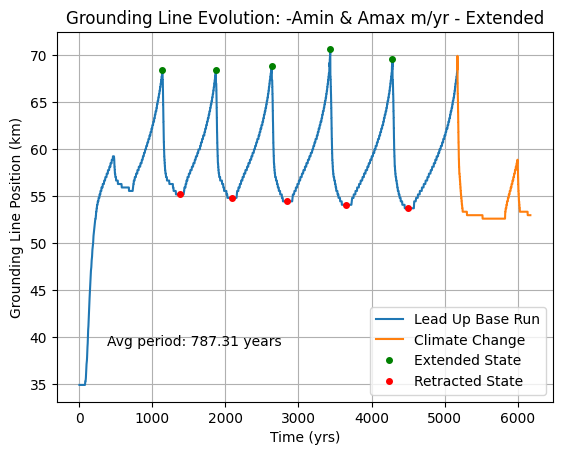

6175.378778589611


In [529]:
time = list(GL_dict.keys())
time_l = list(GL_dict_l.keys())

mesh_indices = np.arange(300)

data_matrix = np.array([GL_dict[t] for t in time])
data_matrix_l = np.array([GL_dict_l[t] for t in time_l])

gl_positions = [np.argmax(row > 0.5) for row in data_matrix]
gl_positions_l = [np.argmax(row > 0.5) for row in data_matrix_l]

GL_km = mesh_index_to_km(np.array(gl_positions))
GL_km_l = mesh_index_to_km(np.array(gl_positions_l))

peaks, _   = find_peaks(GL_km_l, prominence=5)
troughs, _ = find_peaks(-GL_km_l, prominence=5)

periods    = np.diff(np.array(time_l)[peaks])
adv_dists  = GL_km_l[peaks]
ret_dists  = GL_km_l[troughs]

# PLOTTING
fig, ax = plt.subplots()
ax.plot(time_l, GL_km_l, label='Lead Up Base Run')
ax.plot(time, GL_km, label='Climate Change')

ax.plot(np.array(time_l)[peaks],   adv_dists, 'go', label='Extended State', markersize=4)
ax.plot(np.array(time_l)[troughs], ret_dists, 'ro', label='Retracted State', markersize=4)

ax.text(0.1, 0.15, f'Avg period: {np.mean(periods):.2f} years', transform=ax.transAxes)
ax.legend()
ax.set_xlabel(xaxis_GL_better)
ax.set_ylabel(yaxis_GL_better)
ax.set_title(title_GL_better)
ax.grid()
plt.show()
print(time[-1])

# print(f"Mean cycle period: {np.mean(periods):.2f} years")
# print("Periods:", periods)
# print(f"Mean advance amplitude: {np.mean(adv_dists):.2f} km")
# print("Advances:", adv_dists)
# print(f"Mean retreat amplitude: {np.mean(ret_dists):.2f} km")
# print("Retreats:", ret_dists)

In [530]:
colors = [
    # AMIN
    # "#ffab0f",  
    # # "#fd5400",  
    # "#ff0000",

    # AMAX
    # "#3145f5", 
    # "#19d5ff", 

    # MIXED 
    "#4000ff",
    "#b431f5", 
    "#ff1980",       
]

Amax7 Amin-17: time range 5175.0–6175.952950119638, color #4000ff
Amax7 Amin-18: time range 5175.0–6175.378778589611, color #b431f5
Amax6 Amin-17: time range 5175.0–6175.015614536182, color #ff1980


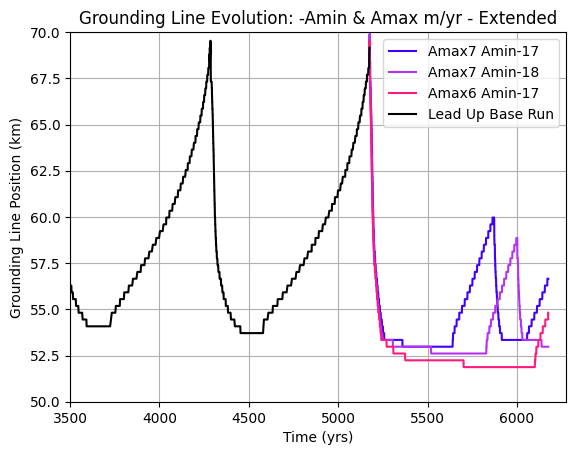

6175.015614536182


In [531]:
fig, ax = plt.subplots()

for (label, run), color in zip(runs.items(), colors):
    time = np.array(list(run["GL"].keys()))
    data_matrix = np.array([run["GL"][t] for t in time])
    gl_positions = np.array([np.argmax(row > 0.5) for row in data_matrix])
    GL_km = mesh_index_to_km(gl_positions)

    print(f"{label}: time range {time[0]}–{time[-1]}, color {color}")
    ax.plot(time, GL_km, label=label, color=color)

ax.plot(time_l, GL_km_l, color = 'black', label='Lead Up Base Run')

ax.set_xlabel(xaxis_GL_better)
ax.set_ylabel(yaxis_GL_better)
ax.set_title(title_GL_better)

ax.set_ylim(50,70)
ax.set_xlim(3500,final_time+100)
ax.legend()
ax.grid()
plt.show()

print(final_time)

### Pulling Velocity Data

In [532]:
def extract_vel(us_dict, ub_dict):
    term_surface_velocity = []
    term_basal_velocity = []

    for t in sorted(us_dict.keys()): 
        us_ = us_dict[t]
        ub_ = ub_dict[t]

        notNAN = np.where(np.isfinite(us_))[0]

        if len(notNAN) > 0:
            terminus = notNAN[-1]
        else:
            terminus = None

        if terminus is not None and terminus >= 50:
            term_usvel = us_[terminus - 50]
            term_ubvel = ub_[terminus - 50]
        else:
            term_usvel = 0
            term_ubvel = 0

        if np.isnan(term_usvel):
            term_usvel = 0
        if np.isnan(term_ubvel):
            term_ubvel = 0

        term_surface_velocity.append(term_usvel)
        term_basal_velocity.append(term_ubvel)
    return np.array(term_surface_velocity), np.array(term_basal_velocity)

In [533]:
usvel_l, ubvel_l = extract_vel(us_dict_l, ub_dict_l)

velocities = {}
for label, run in runs.items():
    us_dict = run["us"]
    ub_dict = run["ub"]

    term_usvel, term_ubvel = extract_vel(us_dict, ub_dict)
    velocities[label] = {
        "us": term_usvel,
        "ub": term_ubvel,
        "time": sorted(us_dict.keys())
    }


## VELOCITY OVER GL PLOT

Amax7 Amin-17: time range 5175.0–6175.952950119638, color #4000ff
Amax7 Amin-18: time range 5175.0–6175.378778589611, color #b431f5
Amax6 Amin-17: time range 5175.0–6175.015614536182, color #ff1980


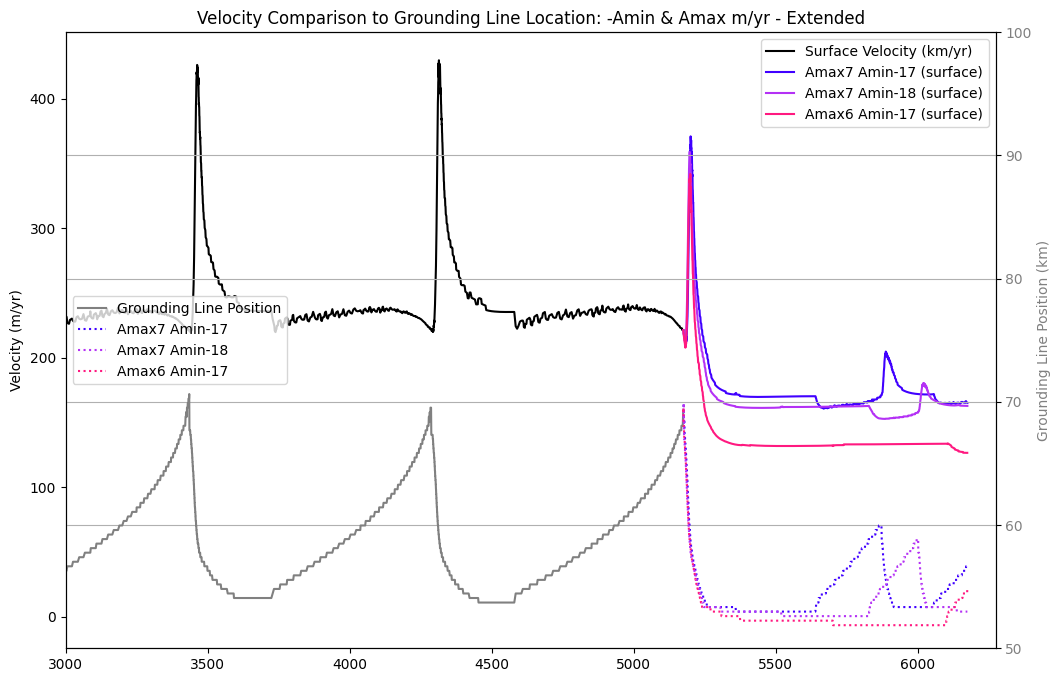

In [539]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# VELOCITY
# Lead up 
ax1.plot(time_l, usvel_l, 'black',  label='Surface Velocity (km/yr)')
ax1.set_ylabel(yaxis_vel)

# Tests
for (label, vels), color in zip(velocities.items(), colors):
    ax1.plot(vels["time"], vels["us"], label=f"{label} (surface)", color = color)

# GL position
ax2 = ax1.twinx()
ax2.plot(time_l, GL_km_l, label='Grounding Line Position', color='gray')
ax2.set_xlabel(xaxis_vel)
ax2.set_ylabel(yaxis_GL_better, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')
ax2.grid()
ax2.set_ylim(50,100)

for (label, run), color in zip(runs.items(), colors):
    time = np.array(list(run["GL"].keys()))
    data_matrix = np.array([run["GL"][t] for t in time])
    gl_positions = np.array([np.argmax(row > 0.5) for row in data_matrix])
    GL_km = mesh_index_to_km(gl_positions)

    print(f"{label}: time range {time[0]}–{time[-1]}, color {color}")
    ax2.plot(time, GL_km, label=label, color=color, linestyle = ':')

ax2.legend(loc=6)
ax1.legend()
ax1.set_xlim(3000,final_time+100)
plt.title(title_GLandVel)
plt.show()


## BED ELEVATION CHANGE PLOT

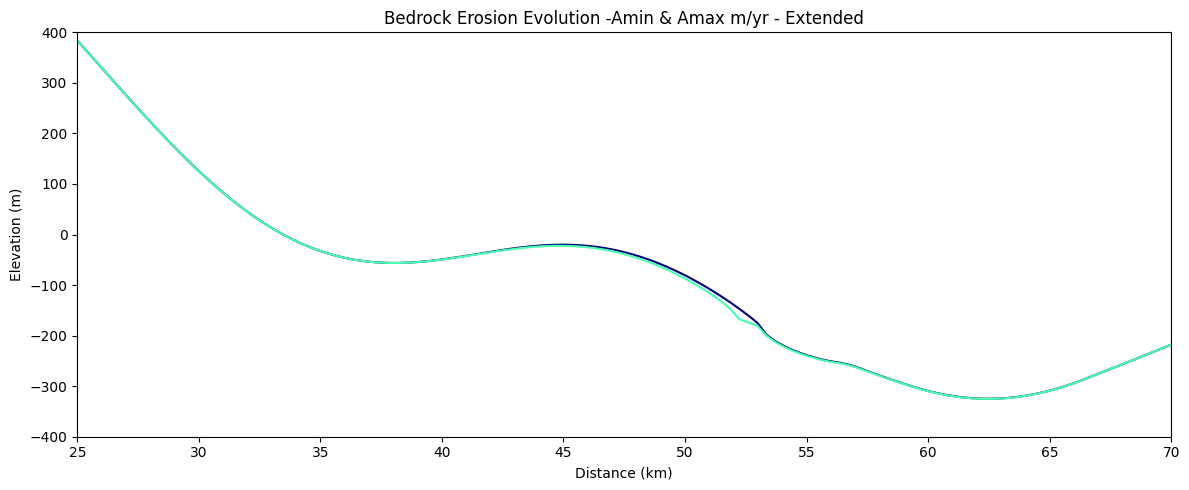

In [535]:
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
# bed_profile = bed_dict[timesteps[0]] 
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(12,5))

for i, t in enumerate(time):
    if i % 1000 != 0:  
        continue

    bed = bed_dict[t]
    color = cmap(norm(t))
    plt.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel(xaxis_bed)
plt.ylabel(yaxis_bed)
plt.title(title_bed)
# plt.gca().invert_xaxis() 
# plt.legend(loc="upper right", fontsize=7)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.xlim(25,70)
plt.ylim(-400,400)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/40K_Base_test/blah.svg", format ="svg", bbox_inches='tight')

## SMB PLOT

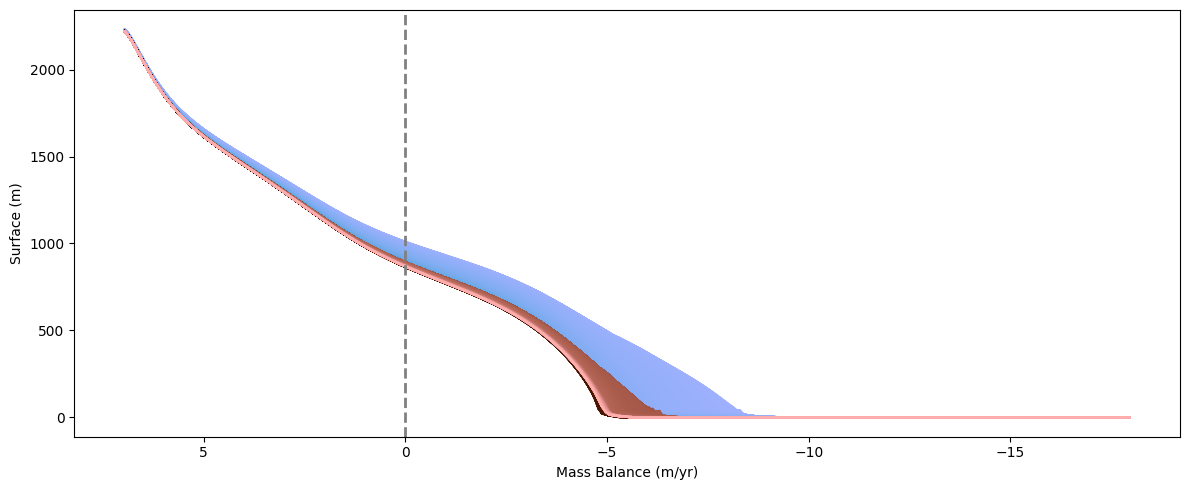

[  6.95833333   6.875        6.79166667   6.70833333   6.625
   6.54166667   6.45833333   6.375        6.29166667   6.20833333
   6.125        6.04166667   5.95833333   5.875        5.79166667
   5.70833333   5.625        5.54166667   5.45833333   5.375
   5.29166667   5.20833333   5.125        5.04166667   4.95833333
   4.875        4.79166667   4.70833333   4.625        4.54166667
   4.45833333   4.375        4.29166667   4.20833333   4.125
   4.04166667   3.95833333   3.875        3.79166667   3.70833333
   3.625        3.54166667   3.45833333   3.375        3.29166667
   3.20833333   3.125        3.04166667   2.95833333   2.875
   2.79166667   2.70833333   2.625        2.54166667   2.45833333
   2.375        2.29166667   2.20833333   2.125        2.04166667
   1.95833333   1.875        1.79166667   1.70833333   1.625
   1.54166667   1.45833333   1.375        1.29166667   1.20833333
   1.125        1.04166667   0.95833333   0.875        0.79166667
   0.70833333   0.625        0.5416

In [536]:
timesteps = sorted(SMB_dict.keys())
smb_profile = SMB_dict[timesteps[0]] 
cmap = cm.berlin

fig,ax  = plt.subplots(figsize=(12,5))


counts = sorted(counter_dict.values())  # all loop counts
sample_counts = counts[::1] 

# make a lookup: loop count → time
loop_to_time = {v: k for k, v in counter_dict.items()}

for j, c in enumerate(sample_counts):
    t = loop_to_time[c]
    surf = surf_dict[t]
    color = cmap(norm(t))
    label = f't={t:.1f}' if j % 5 == 0 else ""
    plt.plot(smb_profile, surf, color=color, label=label)


plt.xlabel(xaxis_SMB)
plt.ylabel(yaxis_SMB)
# plt.title(title_SMB)
plt.gca().invert_xaxis()
# plt.legend(loc="best", fontsize=8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)
plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/FinalFigures/SMB_plot_40k_default.svg", format ="svg", bbox_inches='tight')

final_smb = list(SMB_dict.values())[-1]
print(final_smb)

## Plotting Thickness

ValueError: x and y must have same first dimension, but have shapes (1966,) and (1582,)

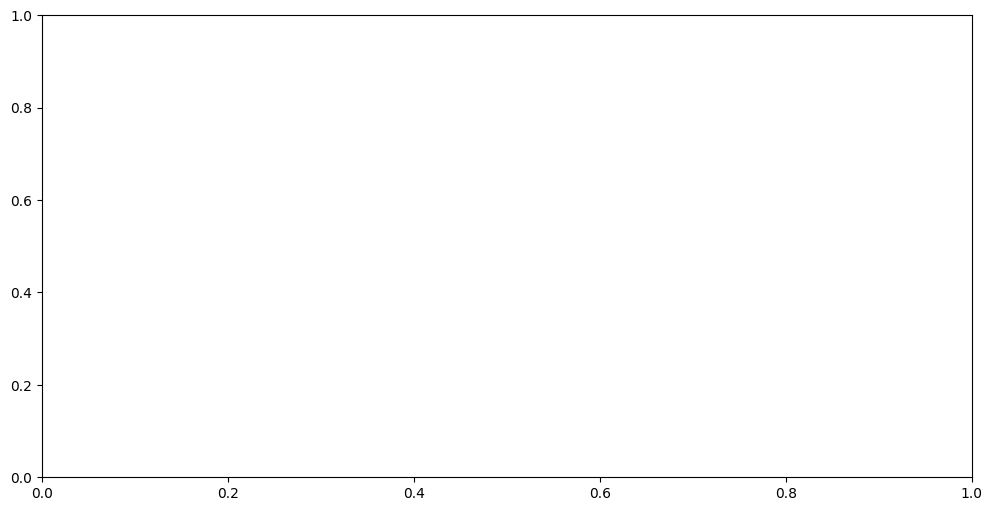

In [537]:
term_thinning = []
dist_behind_terminus = 50
time_steps = sorted(H_dict.keys())

for t in time_steps:
    H_ = H_dict[t]

    terminus_indices = np.where(H_ > 1.0)[0]

    if len(terminus_indices) == 0:
        term_thinning.append(np.nan)
        continue

    terminus = terminus_indices[-1]

    if terminus >= dist_behind_terminus:
        term_H = H_[terminus - dist_behind_terminus]
    else:
        term_H = np.nan

    term_thinning.append(term_H)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(time, GL_km, label='Grounding Line Position', ls = 'dashdot', color='black')
ax1.set_xlabel(xaxis_vel)
ax1.set_ylabel(yaxis_GL_better, color='black')
ax1.tick_params(axis='y', labelcolor='black')
# ax1.set_xlim(2000,8000)
ax1.grid()

# Secondary axis for velocities
ax2 = ax1.twinx()
ax2.plot(time_steps, term_thinning, color='blue', linestyle='-', label=f'Thickness {dist_behind_terminus} nodes behind terminus')
ax2.set_ylabel(("Ice Thickness (m)"), color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Ice Thickness Behind Terminus with GL")
plt.show()

# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/40K_Base_test/Thickness_plot_40k_default.svg", format ="svg", bbox_inches='tight')

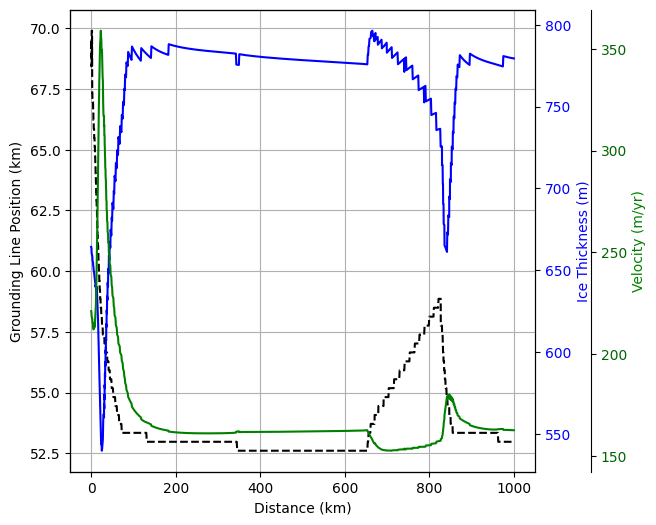

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))

# Grounding Line Position
ax1.plot(time, GL_km, label='Grounding Line Position', ls='--', color='black')
ax1.set_xlabel(xaxis_vel)
ax1.set_ylabel(yaxis_GL_better, color='black')
ax1.tick_params(axis='y', labelcolor='black')
# ax1.set_xlim(3000, 5000)
ax1.grid()

# Ice Thickness behind terminus
ax2 = ax1.twinx()
ax2.plot(time_steps, term_thinning, color='blue', linestyle='-', label=f'Thickness {dist_behind_terminus} nodes behind terminus')
ax2.set_ylabel("Ice Thickness (m)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Surface Velocity — create new axis and offset it to avoid overlapping ax2
ax3 = ax1.twinx()
ax3.plot(time, term_surface_velocity, 'green', ls='-', label='Surface Velocity (km/yr)')
ax3.set_ylabel(yaxis_vel, color='green')
ax3.tick_params(axis='y', labelcolor='darkgreen')

# Offset ax3's spine to the right to prevent overlapping ax2
ax3.spines["right"].set_position(("axes", 1.12))  # 10% to the right of the ax1 right spine
ax3.spines["right"].set_visible(True)  # Make sure it's visible

# Title and show
# plt.title("Sample Cycle from Default")
plt.show()

# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/SingleCycle.svg", format ="svg", bbox_inches='tight')


## Velocity VS Thickness


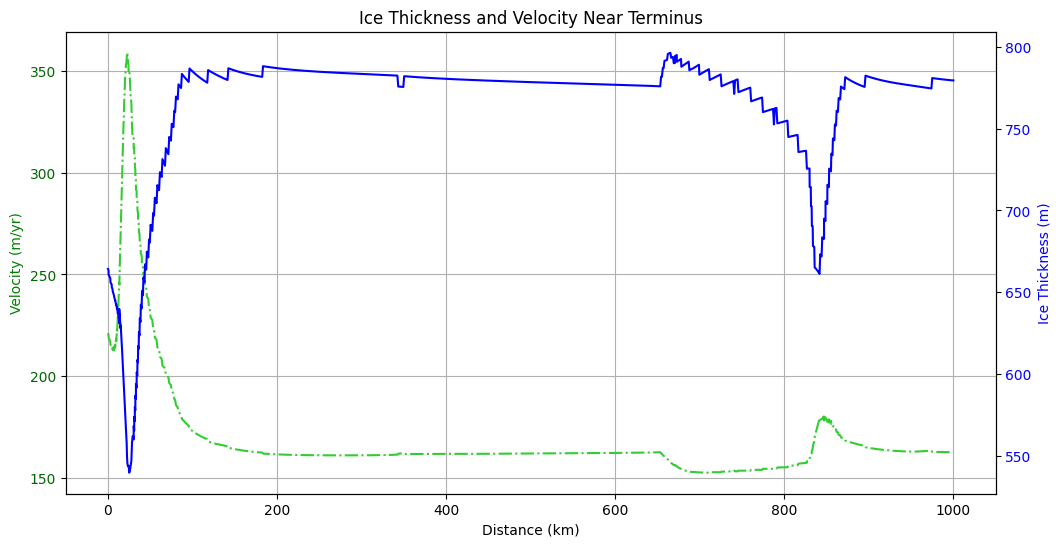

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(time, term_surface_velocity, 'limegreen', ls = '-.', label='Surface Velocity (km/yr)')
ax1.set_xlabel(xaxis_vel)
ax1.set_ylabel(yaxis_vel, color='green')
ax1.tick_params(axis='y', labelcolor='darkgreen')
# ax1.set_xlim(0,10000)
ax1.grid()


ax2 = ax1.twinx()
ax2.plot(time_steps, term_thinning, color='blue', linestyle='-', label=f'Thickness {dist_behind_terminus} nodes behind terminus')
ax2.set_ylabel(("Ice Thickness (m)"), color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


plt.title("Ice Thickness and Velocity Near Terminus")
plt.show()

In [ ]:
vel_peaks, _ = find_peaks(term_surface_velocity, prominence=5) 
H_peaks, _ = find_peaks(term_thinning, prominence=5)     

Text(0, 0.5, 'Near Terminus Surface Velocity')

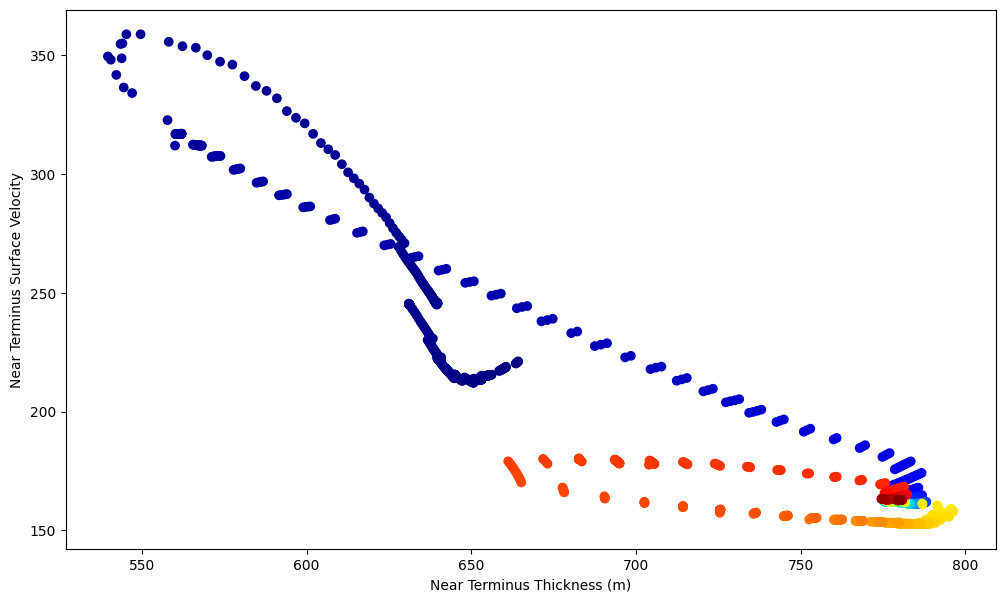

In [ ]:
fig,ax = plt.subplots(figsize = (12,7))
plt.scatter(term_thinning, term_surface_velocity, c = time, cmap = 'jet')
plt.xlabel("Near Terminus Thickness (m)")
plt.ylabel("Near Terminus Surface Velocity")

In [ ]:
print(np.size(vel_peaks))
print(np.size(H_peaks))

2
12
